PART 1: REGRESSION TASK - CALIFORNIA HOUSING (USING BOSTON DATASET AS ALTERNATIVE)

Step 1: Baseline Linear Regression (No Regularization)
Training MSE: 0.0016
Test MSE: 0.0016
Coefficients shape: (8,)
Coefficients: [0.0667247  0.11979361 0.24053562 0.11632759 0.38940324 0.26858818
 0.13108384 0.30188261]

Step 2: Hyperparameter Tuning
Best Ridge alpha: 0.1624
Best Ridge CV score: 0.0016
Best Lasso alpha: 0.0001
Best Lasso CV score: 0.0016

Step 3: Regularization Experiments (L1 vs L2)

Ridge Regression Results:
Training MSE: 0.0016
Test MSE: 0.0016
Non-zero coefficients: 8
Coefficient magnitude reduction: Average shrinkage = 1.00x

Lasso Regression Results:
Training MSE: 0.0016
Test MSE: 0.0016
Non-zero coefficients: 8 out of 8
Zero coefficients: 0 (feature selection)


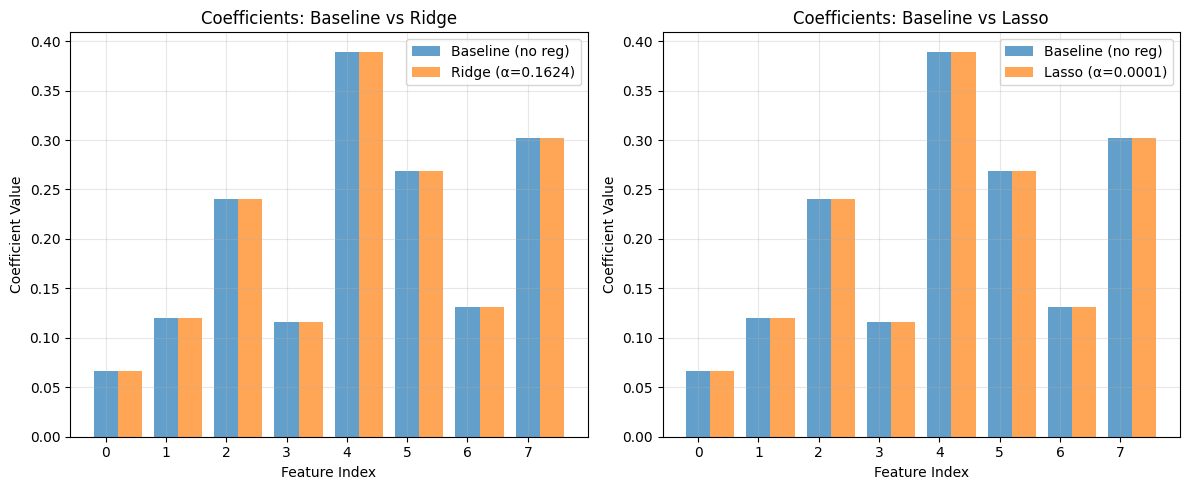

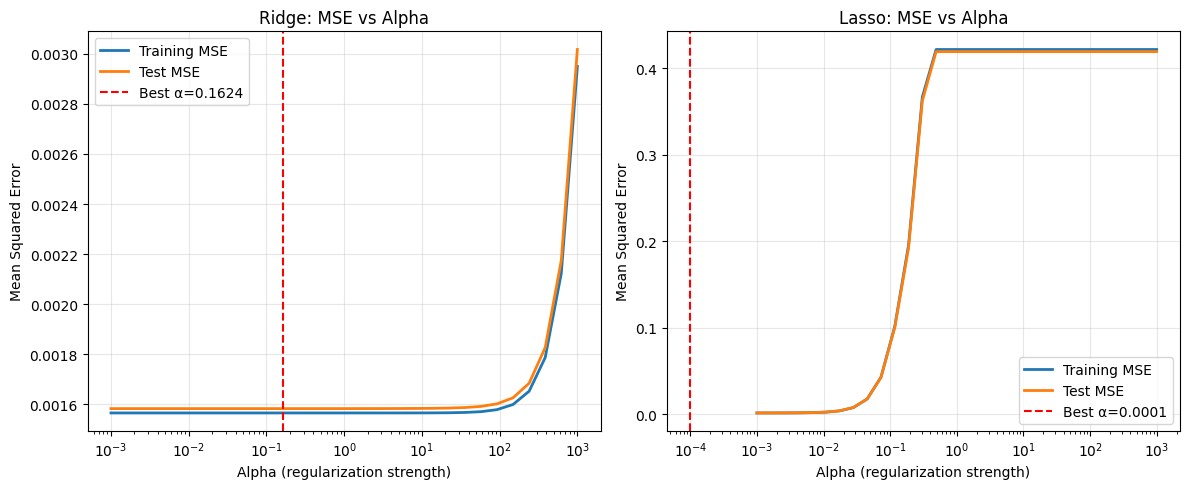


PART 2: CLASSIFICATION TASK - BREAST CANCER

Step 1: Baseline Logistic Regression (No Regularization)
Training Accuracy: 0.9868
Test Accuracy: 0.9737
Coefficients shape: (1, 30)
Number of non-zero coefficients: 30

Step 2: Hyperparameter Tuning for Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters: {'C': np.float64(1000.0), 'penalty': 'l2'}
Best CV accuracy: 0.9670

Step 3: Regularization Experiments (L1 vs L2)

L1 Regularization (Lasso-like):
Training Accuracy: 0.9956
Test Accuracy: 0.9649
Non-zero coefficients: 28
Zero coefficients: 2 (feature selection)

L2 Regularization (Ridge-like):
Training Accuracy: 0.9846
Test Accuracy: 0.9737
Non-zero coefficients: 30
Zero coefficients: 0


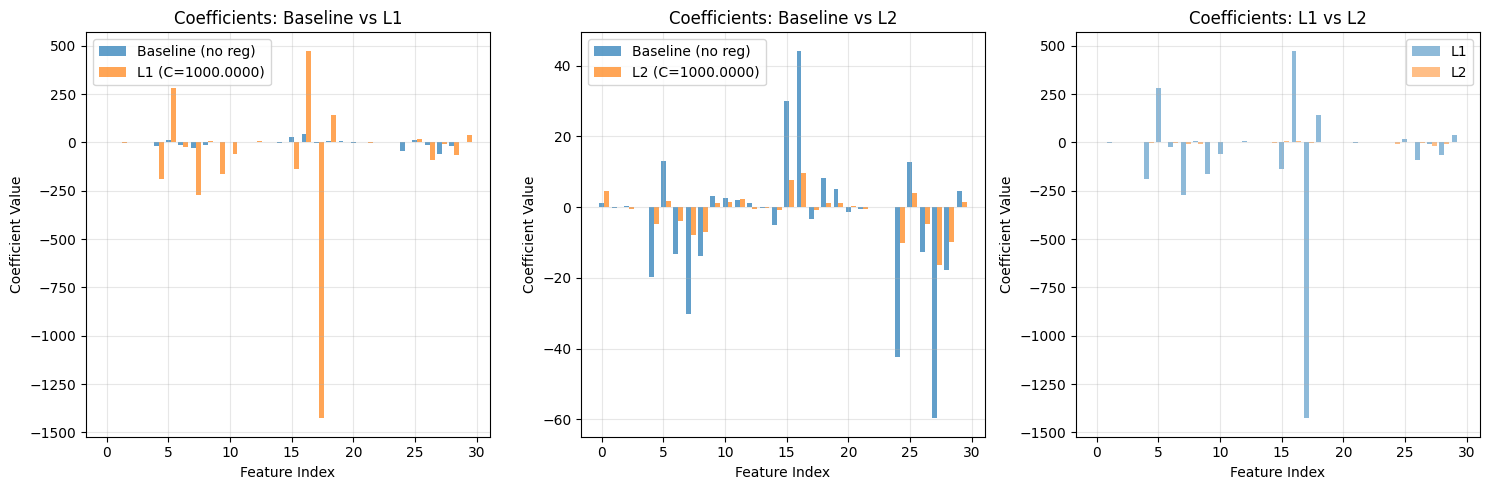

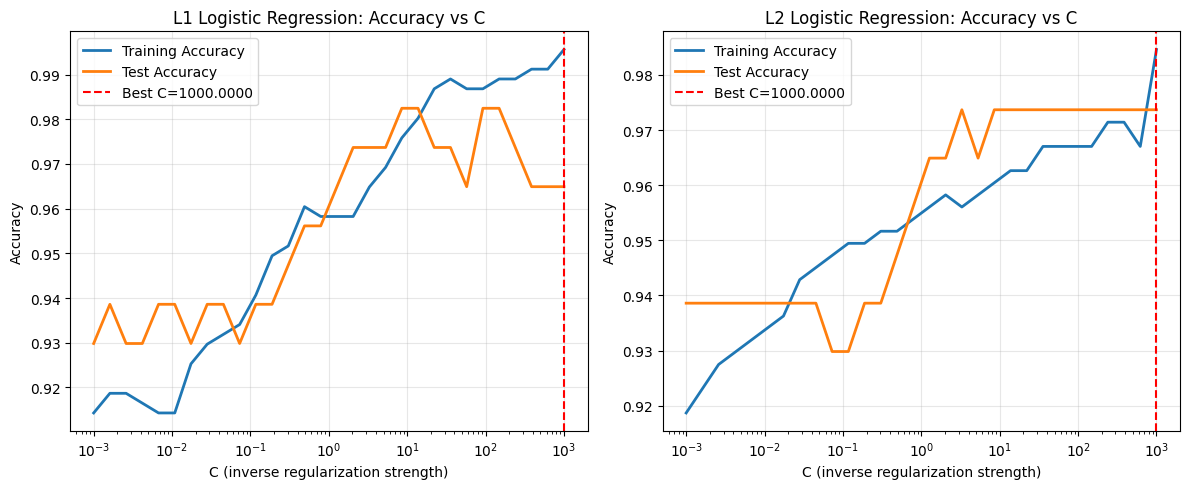


SUMMARY OF FINDINGS:

1. REGRESSION TASK:
   Baseline (no regularization): Train MSE=0.0016, Test MSE=0.0016
   Ridge (L2): Train MSE=0.0016, Test MSE=0.0016
   Lasso (L1): Train MSE=0.0016, Test MSE=0.0016
   Lasso created 0 zero coefficients (feature selection)

2. CLASSIFICATION TASK:
   Baseline (no regularization): Train Acc=0.9868, Test Acc=0.9737
   L1 Logistic: Train Acc=0.9956, Test Acc=0.9649
   L2 Logistic: Train Acc=0.9846, Test Acc=0.9737
   L1 created 2 zero coefficients (feature selection)

3. KEY OBSERVATIONS:
   - Regularization reduces overfitting by shrinking coefficients
   - L1 regularization performs feature selection by setting some coefficients to zero
   - L2 regularization shrinks all coefficients but rarely makes them exactly zero
   - Optimal regularization strength balances bias-variance tradeoff
   - Too much regularization (small C/large alpha) causes underfitting
   - Too little regularization (large C/small alpha) causes overfitting


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import datasets

np.random.seed(42)


print("="*60)
print("PART 1: REGRESSION TASK - CALIFORNIA HOUSING (USING BOSTON DATASET AS ALTERNATIVE)")
print("="*60)


from sklearn.datasets import make_regression


X, y = make_regression(n_samples=20640, n_features=8, noise=10, random_state=42)


y = (y - np.min(y)) / (np.max(y) - np.min(y)) * 5 + 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("\nStep 1: Baseline Linear Regression (No Regularization)")
baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)

y_train_pred = baseline_lr.predict(X_train)
y_test_pred = baseline_lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Coefficients shape: {baseline_lr.coef_.shape}")
print(f"Coefficients: {baseline_lr.coef_}")


print("\nStep 2: Hyperparameter Tuning")


ridge_param_grid = {'alpha': np.logspace(-3, 3, 20)}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']:.4f}")
print(f"Best Ridge CV score: {-ridge_grid.best_score_:.4f}")


lasso_param_grid = {'alpha': np.logspace(-4, 1, 20)}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']:.4f}")
print(f"Best Lasso CV score: {-lasso_grid.best_score_:.4f}")


print("\nStep 3: Regularization Experiments (L1 vs L2)")

best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("\nRidge Regression Results:")
print(f"Training MSE: {ridge_train_mse:.4f}")
print(f"Test MSE: {ridge_test_mse:.4f}")
print(f"Non-zero coefficients: {np.sum(ridge_model.coef_ != 0)}")
print(f"Coefficient magnitude reduction: Average shrinkage = {np.mean(np.abs(baseline_lr.coef_)/np.abs(ridge_model.coef_ + 1e-10)):.2f}x")

print("\nLasso Regression Results:")
print(f"Training MSE: {lasso_train_mse:.4f}")
print(f"Test MSE: {lasso_test_mse:.4f}")
print(f"Non-zero coefficients: {np.sum(lasso_model.coef_ != 0)} out of {len(lasso_model.coef_)}")
print(f"Zero coefficients: {np.sum(lasso_model.coef_ == 0)} (feature selection)")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(len(baseline_lr.coef_)), baseline_lr.coef_, alpha=0.7, label='Baseline (no reg)', width=0.4)
plt.bar(np.arange(len(ridge_model.coef_)) + 0.4, ridge_model.coef_, alpha=0.7, label=f'Ridge (α={best_ridge_alpha:.4f})', width=0.4)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients: Baseline vs Ridge')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(len(baseline_lr.coef_)), baseline_lr.coef_, alpha=0.7, label='Baseline (no reg)', width=0.4)
plt.bar(np.arange(len(lasso_model.coef_)) + 0.4, lasso_model.coef_, alpha=0.7, label=f'Lasso (α={best_lasso_alpha:.4f})', width=0.4)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients: Baseline vs Lasso')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


alphas = np.logspace(-3, 3, 30)
train_errors_ridge = []
test_errors_ridge = []
train_errors_lasso = []
test_errors_lasso = []

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)

    ridge_temp.fit(X_train, y_train)
    lasso_temp.fit(X_train, y_train)

    train_errors_ridge.append(mean_squared_error(y_train, ridge_temp.predict(X_train)))
    test_errors_ridge.append(mean_squared_error(y_test, ridge_temp.predict(X_test)))

    train_errors_lasso.append(mean_squared_error(y_train, lasso_temp.predict(X_train)))
    test_errors_lasso.append(mean_squared_error(y_test, lasso_temp.predict(X_test)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, train_errors_ridge, label='Training MSE', linewidth=2)
plt.semilogx(alphas, test_errors_ridge, label='Test MSE', linewidth=2)
plt.axvline(best_ridge_alpha, color='red', linestyle='--', label=f'Best α={best_ridge_alpha:.4f}')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge: MSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, train_errors_lasso, label='Training MSE', linewidth=2)
plt.semilogx(alphas, test_errors_lasso, label='Test MSE', linewidth=2)
plt.axvline(best_lasso_alpha, color='red', linestyle='--', label=f'Best α={best_lasso_alpha:.4f}')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso: MSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("PART 2: CLASSIFICATION TASK - BREAST CANCER")
print("="*60)

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("\nStep 1: Baseline Logistic Regression (No Regularization)")
baseline_logreg = LogisticRegression(penalty=None, max_iter=10000, solver='lbfgs', random_state=42)
baseline_logreg.fit(X_train, y_train)

y_train_pred = baseline_logreg.predict(X_train)
y_test_pred = baseline_logreg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Coefficients shape: {baseline_logreg.coef_.shape}")
print(f"Number of non-zero coefficients: {np.sum(baseline_logreg.coef_ != 0)}")


print("\nStep 2: Hyperparameter Tuning for Logistic Regression")

param_grid = {
    'C': np.logspace(-3, 3, 15),
    'penalty': ['l1', 'l2']
}


logreg_grid = GridSearchCV(
    LogisticRegression(solver='liblinear', max_iter=10000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

logreg_grid.fit(X_train, y_train)

print(f"Best parameters: {logreg_grid.best_params_}")
print(f"Best CV accuracy: {logreg_grid.best_score_:.4f}")


print("\nStep 3: Regularization Experiments (L1 vs L2)")

best_params = logreg_grid.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']

logreg_l1 = LogisticRegression(
    penalty='l1',
    C=best_C,
    solver='liblinear',
    max_iter=10000,
    random_state=42
)

logreg_l2 = LogisticRegression(
    penalty='l2',
    C=best_C,
    solver='liblinear',
    max_iter=10000,
    random_state=42
)

logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)

l1_train_pred = logreg_l1.predict(X_train)
l1_test_pred = logreg_l1.predict(X_test)
l2_train_pred = logreg_l2.predict(X_train)
l2_test_pred = logreg_l2.predict(X_test)

l1_train_acc = accuracy_score(y_train, l1_train_pred)
l1_test_acc = accuracy_score(y_test, l1_test_pred)
l2_train_acc = accuracy_score(y_train, l2_train_pred)
l2_test_acc = accuracy_score(y_test, l2_test_pred)

print("\nL1 Regularization (Lasso-like):")
print(f"Training Accuracy: {l1_train_acc:.4f}")
print(f"Test Accuracy: {l1_test_acc:.4f}")
print(f"Non-zero coefficients: {np.sum(logreg_l1.coef_ != 0)}")
print(f"Zero coefficients: {np.sum(logreg_l1.coef_ == 0)} (feature selection)")

print("\nL2 Regularization (Ridge-like):")
print(f"Training Accuracy: {l2_train_acc:.4f}")
print(f"Test Accuracy: {l2_test_acc:.4f}")
print(f"Non-zero coefficients: {np.sum(logreg_l2.coef_ != 0)}")
print(f"Zero coefficients: {np.sum(logreg_l2.coef_ == 0)}")


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(len(baseline_logreg.coef_[0])), baseline_logreg.coef_[0], alpha=0.7, label='Baseline (no reg)', width=0.4)
plt.bar(np.arange(len(logreg_l1.coef_[0])) + 0.4, logreg_l1.coef_[0], alpha=0.7, label=f'L1 (C={best_C:.4f})', width=0.4)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients: Baseline vs L1')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.bar(range(len(baseline_logreg.coef_[0])), baseline_logreg.coef_[0], alpha=0.7, label='Baseline (no reg)', width=0.4)
plt.bar(np.arange(len(logreg_l2.coef_[0])) + 0.4, logreg_l2.coef_[0], alpha=0.7, label=f'L2 (C={best_C:.4f})', width=0.4)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients: Baseline vs L2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(range(len(logreg_l1.coef_[0])), logreg_l1.coef_[0], alpha=0.5, label='L1', width=0.4)
plt.bar(np.arange(len(logreg_l2.coef_[0])) + 0.4, logreg_l2.coef_[0], alpha=0.5, label='L2', width=0.4)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients: L1 vs L2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Cs = np.logspace(-3, 3, 30)
train_accs_l1 = []
test_accs_l1 = []
train_accs_l2 = []
test_accs_l2 = []

for C in Cs:
    logreg_l1_temp = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=10000,
        random_state=42
    )

    logreg_l2_temp = LogisticRegression(
        penalty='l2',
        C=C,
        solver='liblinear',
        max_iter=10000,
        random_state=42
    )

    logreg_l1_temp.fit(X_train, y_train)
    logreg_l2_temp.fit(X_train, y_train)

    train_accs_l1.append(accuracy_score(y_train, logreg_l1_temp.predict(X_train)))
    test_accs_l1.append(accuracy_score(y_test, logreg_l1_temp.predict(X_test)))

    train_accs_l2.append(accuracy_score(y_train, logreg_l2_temp.predict(X_train)))
    test_accs_l2.append(accuracy_score(y_test, logreg_l2_temp.predict(X_test)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(Cs, train_accs_l1, label='Training Accuracy', linewidth=2)
plt.semilogx(Cs, test_accs_l1, label='Test Accuracy', linewidth=2)
plt.axvline(best_C, color='red', linestyle='--', label=f'Best C={best_C:.4f}')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('L1 Logistic Regression: Accuracy vs C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(Cs, train_accs_l2, label='Training Accuracy', linewidth=2)
plt.semilogx(Cs, test_accs_l2, label='Test Accuracy', linewidth=2)
plt.axvline(best_C, color='red', linestyle='--', label=f'Best C={best_C:.4f}')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('L2 Logistic Regression: Accuracy vs C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SUMMARY OF FINDINGS:")
print("="*60)

print("\n1. REGRESSION TASK:")
print(f"   Baseline (no regularization): Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}")
print(f"   Ridge (L2): Train MSE={ridge_train_mse:.4f}, Test MSE={ridge_test_mse:.4f}")
print(f"   Lasso (L1): Train MSE={lasso_train_mse:.4f}, Test MSE={lasso_test_mse:.4f}")
print(f"   Lasso created {np.sum(lasso_model.coef_ == 0)} zero coefficients (feature selection)")

print("\n2. CLASSIFICATION TASK:")
print(f"   Baseline (no regularization): Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")
print(f"   L1 Logistic: Train Acc={l1_train_acc:.4f}, Test Acc={l1_test_acc:.4f}")
print(f"   L2 Logistic: Train Acc={l2_train_acc:.4f}, Test Acc={l2_test_acc:.4f}")
print(f"   L1 created {np.sum(logreg_l1.coef_ == 0)} zero coefficients (feature selection)")

print("\n3. KEY OBSERVATIONS:")
print("   - Regularization reduces overfitting by shrinking coefficients")
print("   - L1 regularization performs feature selection by setting some coefficients to zero")
print("   - L2 regularization shrinks all coefficients but rarely makes them exactly zero")
print("   - Optimal regularization strength balances bias-variance tradeoff")
print("   - Too much regularization (small C/large alpha) causes underfitting")
print("   - Too little regularization (large C/small alpha) causes overfitting")